# UK car accidents

In [16]:
# loading traditional packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# OLS regression
import statsmodels.api as sm
from statsmodels.formula.api import ols

# prediction metrics
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE


In [17]:
def myTSplot(x, label=None):
    dfexcise[x].plot()
    plt.title('Plot of '+ label)
    plt.xticks(range(10), dfexcise['year'], rotation='vertical')
    plt.grid()
    plt.show()

## 1. Import the data

In [18]:
# read the data from the MS Excel file
dfexcise = pd.read_excel('alcohol2.xlsx', 'data', index_col=None, na_values=['NA'])

In [19]:
# look at the head of the data frame
dfexcise.head(n=10)

,year,sales,excise
0,2004,2086,135.0
1,2005,2035,146.0
2,2006,1972,159.0
3,2007,1846,162.0
4,2008,1772,173.5
5,2009,1661,191.0
6,2010,1578,210.0
7,2011,1505,231.0
8,2012,1533,300.0
9,2013,1282,400.0


## 2. Exploratory data analysis

### 2.1. Descriptive statistics

In [20]:
# calculate basic descriptive statistics
dfexcise.describe().round(2)

,year,sales,excise
count,10.00,10.00,10.00
mean,2008.50,1727.00,210.75
std,3.03,260.65,82.30
min,2004.00,1282.00,135.00
25%,2006.25,1544.25,159.75
50%,2008.50,1716.50,182.25
75%,2010.75,1940.50,225.75
max,2013.00,2086.00,400.00


### 2.2. Graphical analysis: individual time-series graphs

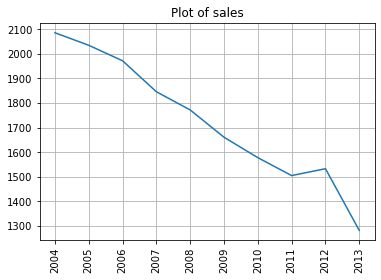

In [21]:
# Plot of NewCars
myTSplot('sales', 'sales')

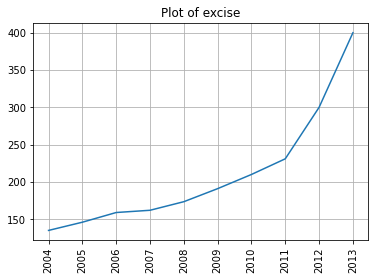

In [22]:
# Plot of GDP
myTSplot('excise', 'excise')

## 2.3. Correlation and graphical analysis (scatter plot)

In [25]:
# extract variables
year = dfexcise['year']
sales = dfexcise['sales']
excise = dfexcise['excise']

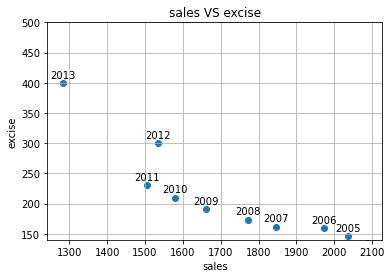

In [31]:
# scatter plot
plt.scatter(sales, excise)
plt.xlabel("sales")
plt.ylabel("excise")
plt.title("sales VS excise")
plt.ylim(140, 500)
plt.grid()

# add labels to data points
for i,x,y in zip(year,sales,excise):
    label = f"{i}"
    plt.annotate(i, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,5), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

# show the plot
plt.show()

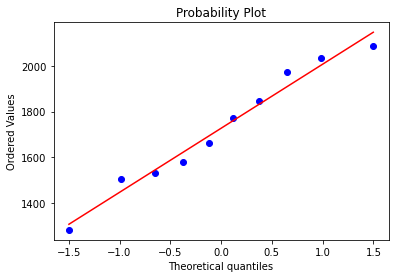

In [32]:
# NewCars: Q-Q plot
stats.probplot(sales, dist="norm", plot=plt)
plt.show()

In [33]:
# The Jarque-Bera normality test
JB_test = pd.DataFrame(stats.jarque_bera(sales), columns=['value'], 
                       index=['chi^2 test statistic', 'chi^2 test p-value'])

print('\n --- The Jarque-Bera normality test for GDP ---')
print(JB_test)


 --- The Jarque-Bera normality test for GDP ---
                         value
chi^2 test statistic  0.481065
chi^2 test p-value    0.786209


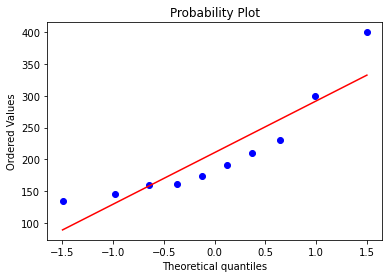

In [34]:
# Accidents: Q-Q plot
stats.probplot(excise, dist="norm", plot=plt)
plt.show()

In [35]:
# The Jarque-Bera normality test
JB_test = pd.DataFrame(stats.jarque_bera(excise), columns=['value'], 
                       index=['chi^2 test statistic', 'chi^2 test p-value'])

print('\n --- The Jarque-Bera normality test for CONS ---')
print(JB_test)


 --- The Jarque-Bera normality test for CONS ---
                         value
chi^2 test statistic  3.354108
chi^2 test p-value    0.186924


In [36]:
# run a pair-wise correlation analysis
coefPears, pvPears = stats.pearsonr(excise, sales)

print("Pearson's correlation coefficient = ", round(coefPears,3))
print("Pearson's p-value = ", round(pvPears,3))

Pearson's correlation coefficient =  -0.89
Pearson's p-value =  0.001


## 3. Linear regression analysis

### 3.1. MODEL 1: Pair-wise linear regression estimation

In [71]:
# create the training sample
dfTrain = dfexcise[0:7] # 10 obs.

# create the test sample
dfTest = dfexcise[7:7] # 2 obs

In [72]:
# estimate the model
formula1 = 'excise ~ sales'
model1 = ols(formula1, dfTrain).fit()
model1.summary()

/home/ina/anaconda3/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 excise   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     115.7
Date:                Tue, 15 Nov 2022   Prob (F-statistic):           0.000120
Time:                        06:36:54   Log-Likelihood:                -21.020
No. Observations:                   7   AIC:                             46.04
Df Residuals:                       5   BIC:                             45.93
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    412.3677     22.818     18.072      0.000     353.712     471.023
sales         -0.1321      0.012    -10.755      0.000      -0.164      -0.100
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.815
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.625
Skew:                           0.198   Prob(JB):                        0.731
Kurtosis:                       1.590   Cond. No.                     1.95e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.95e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [73]:
# get the estimates of coefficients
model1.params

Intercept    412.367698
sales         -0.132052
dtype: float64

### 3.2. MODEL 1: Hypotheses testing

In [ ]:
# test the disturbances for normality
# using the Jarque-Bera test

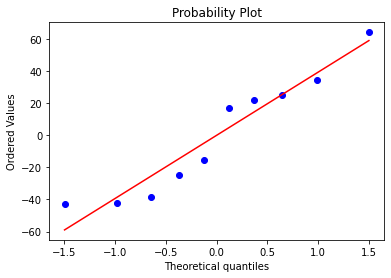

In [40]:
# Residuals: Q-Q plot
stats.probplot(model1.resid, dist="norm", plot=plt)
plt.show()

In [41]:
# run a linear hypothesis test
linHypothesis = '(sales = 1)'
print(model1.f_test(linHypothesis))

<F test: F=635.9108258587898, p=6.54764130118805e-09, df_denom=8, df_num=1>


### 3.3. MODEL 1: In-sample predictions

In [64]:
# predict for in-sample observations
acc_pred_train = model1.get_prediction(dfTrain, weights=1).summary_frame(alpha=0.05)
acc_pred_train.tail(2).round(2)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
8,265.29,15.97,228.47,302.11,166.56,364.02
9,335.86,25.86,276.21,395.50,226.54,445.17


In [57]:
# actual data on Accidents
dfexcise.tail(2)

,year,sales,excise
8,2012,1533,300.0
9,2013,1282,400.0


In [65]:
# Root Mean Square Error (RMSE)
np.sqrt(MSE(acc_pred_train['mean'], dfTrain['excise'])).round(2)

35.53

In [66]:
# Mean Absolute Error (MAE)
MAE(acc_pred_train['mean'], dfTrain['excise']).round(2)

32.6

In [67]:
# actual data summary
dfexcise.describe()

,year,sales,excise
count,10.00000,10.0000,10.000000
mean,2008.50000,1727.0000,210.750000
std,3.02765,260.6526,82.296635
min,2004.00000,1282.0000,135.000000
25%,2006.25000,1544.2500,159.750000
50%,2008.50000,1716.5000,182.250000
75%,2010.75000,1940.5000,225.750000
max,2013.00000,2086.0000,400.000000


In [68]:
round(10.44/222.5,4)

0.0469

### 3.4. MODEL 1: Out-of-sample predictions

In [49]:
# predict for out-of-sample observations
print(model1.get_prediction(dfTest, weights=1).summary_frame(alpha=0.05).round(2))
dfTest

Empty DataFrame
Columns: [mean, mean_se, mean_ci_lower, mean_ci_upper, obs_ci_lower, obs_ci_upper]
Index: []


,year,sales,excise
